In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

import autokeras as ak

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)
print(y_train[:3])  # array([7, 2, 1], dtype=uint8)

(60000, 28, 28)
(60000,)
[5 0 4]


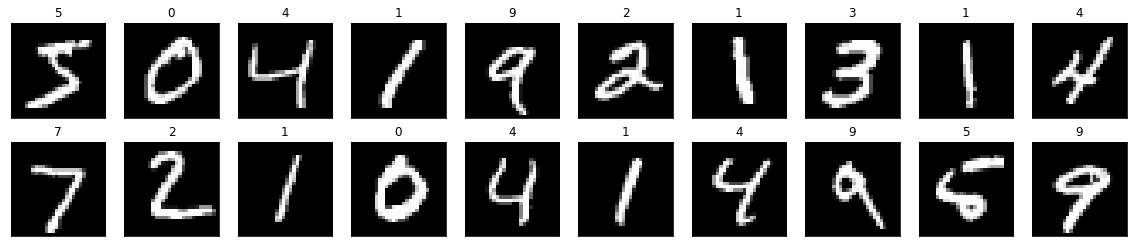

In [3]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(x_test[i])
  plt.title(y_test[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [4]:
# Initialize the image classifier.
clf = ak.ImageClassifier(overwrite=True, max_trials=1)
# Feed the image classifier with training data.

In [5]:
clf.fit(x_train, y_train, epochs=10)

Trial 1 Complete [00h 01m 50s]
val_loss: 0.03912021219730377

Best val_loss So Far: 0.03912021219730377
Total elapsed time: 00h 01m 50s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1595 - accuracy: 0.9510
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0729 - accuracy: 0.9775
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0597 - accuracy: 0.9811
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0494 - accuracy: 0.9842
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0452 - accuracy: 0.9857
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0408 - accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0362 - accuracy: 0.9884
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0358 - accuracy: 0.9883
Ep

In [6]:
# # CPU 학습
# print("CPU를 사용한 학습")
# with tf.device("/device:CPU:0"):
#   clf.fit(x_train, y_train, epochs=3)

In [7]:
# # GPU 학습
# print("GPU를 사용한 학습")
# with tf.device("/device:GPU:0"):
#   clf.fit(x_train, y_train, epochs=3)

In [8]:
# Export as a Keras Model
model = clf.export_model()
print(type(model.summary()))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 28, 28)           0         
 t32)                                                            
                                                                 
 expand_last_dim (ExpandLast  (None, 28, 28, 1)        0         
 Dim)                                                            
                                                                 
 normalization (Normalizatio  (None, 28, 28, 1)        3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                             

In [9]:
# Predict with the best model.
predicted_y = clf.predict(x_test)
print(predicted_y[:10])

313/313 [==============================] - 1s 3ms/step
[['7']
 ['2']
 ['1']
 ['0']
 ['4']
 ['1']
 ['4']
 ['9']
 ['5']
 ['9']]


In [10]:
# Evaluate the best model with testing data.
print(clf.evaluate(x_test, y_test))

313/313 [==============================] - 2s 4ms/step - loss: 0.0356 - accuracy: 0.9897
[0.0356435589492321, 0.9897000193595886]


In [11]:
from tensorflow.keras.utils import plot_model

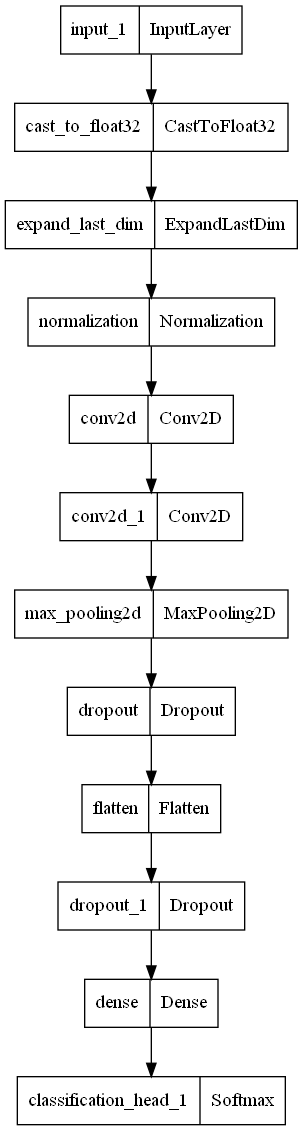

In [12]:
plot_model(model, "C:/workspace/autoencoder/first_model.png")

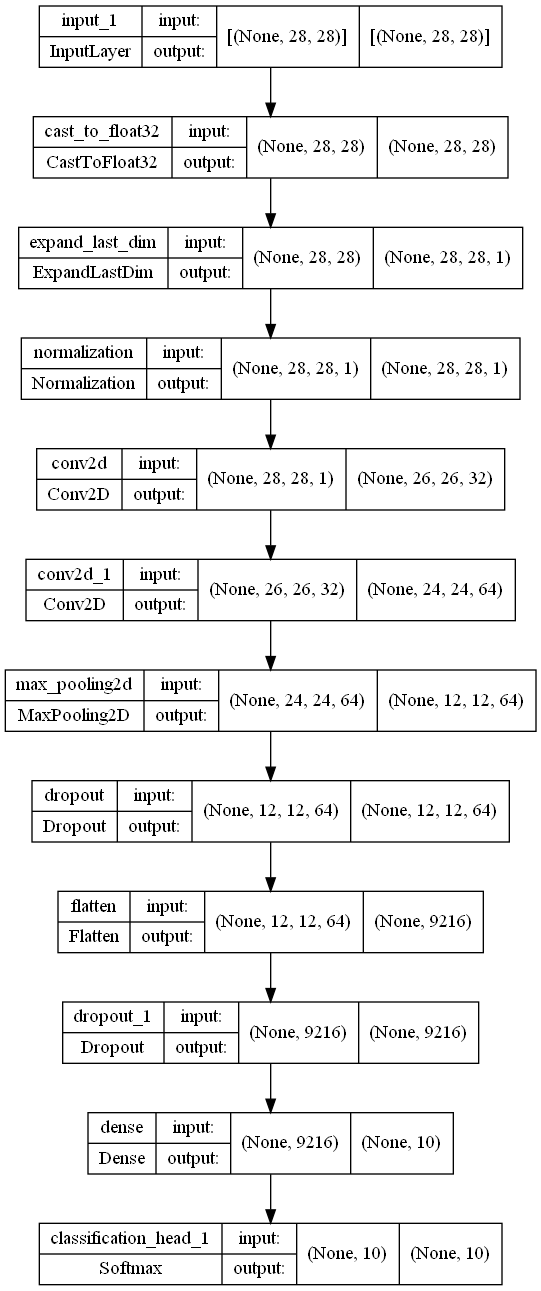

In [13]:
plot_model(model, "C:/workspace/autoencoder/first_model_with_shape_info.png", show_shapes=True)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 28, 28)           0         
 t32)                                                            
                                                                 
 expand_last_dim (ExpandLast  (None, 28, 28, 1)        0         
 Dim)                                                            
                                                                 
 normalization (Normalizatio  (None, 28, 28, 1)        3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                             